In [2]:
###################################################
import emcee
import numpy as np
import scipy

from astropy.io import fits
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.cosmology import Planck18 as cosmo
from functools import partial
import time
from astropy.coordinates import SkyCoord
import astropy.units as u
import pyccl as ccl
import clevar
import numpy as np
from astropy.table import Table
import clmm
from clevar.catalog import ClCatalog, MemCatalog
from clevar.match_metrics import recovery
import matplotlib.pyplot as plt
from clevar.match import MembershipMatch
from clevar.match_metrics import distances
from clevar.match_metrics import scaling
from clevar.match import ProximityMatch
from clevar.match_metrics.recovery import ClCatalogFuncs as r_cf
###################################################

## Loading catalogs. Not needed 

In [3]:
# import numpy as np
# import matplotlib as mpl
# import sys
# sys.path.append("/sps/lsst/users/maguena/git_codes/wazp_dc2_paper/src_files/")
# import pyscritps as paper_tools
# from pyscritps import gaussian_paper as gp
# import clevar

# dc2dir = "/sps/lsst/users/maguena/cats/dc2/cosmoDC2_v1.1.4/extragal/full"
# cpath = f"{dc2dir}/wazp/pywazp_gaussian_new"
# hpath = f"{dc2dir}/halos"
# mt_path = "/sps/lsst/users/maguena/working/wazp_dc2/pywazp_new/"

# # select which pz scatter case to be used
# cases = ("010", "015", "020", "030", "050")

# # read catalogs
# data = gp.core.MainData(cpath, hpath, cases, mt_path=mt_path)

# # # Match catalogs
# data.load_match()


# # Compute max share fraction
# data.load_match_input()
# data.add_shared_frac_max()

# # Get matched pairs
# from clevar.match import get_matched_pairs



In [4]:
# def get_matched_catalogs(wazp, halos, sig):
#     h, w = get_matched_pairs(
#         halos,
#         wazp[sig],
#         f"cross.sig{sig}",
#     )
#     return h,w
# cat1, cat2 = get_matched_catalogs(data.wazp, data.halos, '010')
# cols_to_remove = [c for c in cat1.colnames if 'sig' in c]

# for col in cols_to_remove:
#     del cat1[col]

# cols_to_remove = [c for c in data.halos.colnames if 'sig' in c]

# for col in cols_to_remove:
#     del data.halos[col]
    
# cat1.write("/sps/lsst/groups/clusters/cl_pipeline_project/pywazp_gaussian_catalogs/matched_halo_catalog.fits", overwrite=True)
# cat2.write("/sps/lsst/groups/clusters/cl_pipeline_project/pywazp_gaussian_catalogs/matched_cluster_010_photoz_catalog.fits", overwrite=True)
# data.halos.write("/sps/lsst/groups/clusters/cl_pipeline_project/pywazp_gaussian_catalogs/cosmodc2_halo_catalog.fits", overwrite=True)
# data.wazp['010'].write("/sps/lsst/groups/clusters/cl_pipeline_project/pywazp_gaussian_catalogs/cluster_010_photoz_catalog.fits", overwrite=True)

# mask = (cat2["mt_cross"] != -1) & (cat2["mt_cross"] != None)
# cat_halo_cluster_match = cat2[mask]

# cat_halo_cluster_match["m200c"]     = np.full(len(cat_halo_cluster_match), -1., dtype=float)
# cat_halo_cluster_match["halo_mass"]     = np.full(len(cat_halo_cluster_match), -1., dtype=float)
# cat_halo_cluster_match["z_h"]       = np.full(len(cat_halo_cluster_match), -1., dtype=float)
# cat_halo_cluster_match["ra_true"]   = np.full(len(cat_halo_cluster_match), -1., dtype=float)
# cat_halo_cluster_match["dec_true"]  = np.full(len(cat_halo_cluster_match), -1., dtype=float)
# cat_halo_cluster_match["NMEM_true"] = np.full(len(cat_halo_cluster_match), -1, dtype=int)  # richness is int
# display(cat_halo_cluster_match[cat_halo_cluster_match["mt_cross"] == str(7300151475)])

# m200c_halos = Table.read("/sps/lsst/users/maguena/cats/dc2/cosmoDC2_v1.1.4/extragal/full/halos/halos_m200c_13.0.fits")
# cat_halo_cluster_match["mt_cross"] = cat_halo_cluster_match["mt_cross"].astype(int)
# cat1["halo_id"] = cat1["halo_id"].astype(int)
# m200c_halos["halo_id"] = m200c_halos["halo_id"].astype(int)
# display(m200c_halos)
# j = 0
# for i, halo_idx in enumerate(cat_halo_cluster_match["mt_cross"]):

#     halo_row = cat1[cat1["halo_id"] == halo_idx]
#     m200c_row = m200c_halos[m200c_halos["halo_id"] == halo_idx]
#     if len(halo_row) != 1:
#         raise ValueError(f"halo_id {halo_idx} matched {len(halo_row)} rows")
#     halo_row = cat1[cat1["halo_id"] == halo_idx]
#     m200c_row = m200c_halos[m200c_halos["halo_id"] == halo_idx]

#     if len(halo_row) != 1:
#         raise ValueError(f"halo_id {halo_idx} matched {len(halo_row)} rows in cat1")

#     if len(m200c_row) != 1:
#         m200c_value = -1.0
#         j+=1
#     else:
#         m200c_value = m200c_row["m200c"][0]
#     cat_halo_cluster_match["halo_mass"][i]    = halo_row["halo_mass"][0]
#     cat_halo_cluster_match["m200c"][i]        = m200c_value # <-- extract scalar
#     cat_halo_cluster_match["z_h"][i]          = halo_row["redshift_true"][0]
#     cat_halo_cluster_match["ra_true"][i]      = halo_row["ra_true"][0]
#     cat_halo_cluster_match["dec_true"][i]     = halo_row["dec_true"][0]
#     cat_halo_cluster_match["NMEM_true"][i]    = halo_row["NMEM_z_star2"][0]
# display(cat_halo_cluster_match)
# print(j)
# cat_halo_cluster_match.write(
#     "/sps/lsst/groups/clusters/cl_pipeline_project/pywazp_gaussian_catalogs/matched_halo_cluster_catalog.fits",
#     overwrite=True
# )


In [5]:
from astropy.table import Table

t_cl_halo_match = Table.read("/sps/lsst/groups/clusters/cl_pipeline_project/pywazp_gaussian_catalogs/matched_halo_cluster_catalog.fits")

t_cl_match = Table.read("/sps/lsst/groups/clusters/cl_pipeline_project/pywazp_gaussian_catalogs/matched_cluster_010_photoz_catalog.fits")

t_halo_match = Table.read("/sps/lsst/groups/clusters/cl_pipeline_project/pywazp_gaussian_catalogs/matched_halo_catalog.fits")
display(t_cl_halo_match)
t_cl_halo_match = t_cl_halo_match[t_cl_halo_match['m200c'] > -1]
display(t_cl_halo_match)
Mp, zp = 10**14.3, 0.5

###################################################
coord_cl = SkyCoord(t_cl_halo_match['ra'], t_cl_halo_match['dec'], unit='deg')
coord_h  = SkyCoord(t_cl_halo_match['ra_true'], t_cl_halo_match['dec_true'], unit='deg')

sep = coord_cl.separation(coord_h)
print("Median sep:", np.median(sep.to(u.arcmin)))
print("Max sep:", np.max(sep.to(u.arcmin)))

print(np.min(t_cl_halo_match['n200']))

ra,dec,zp,n200,r200_mpc,id,snr,mt_self,mt_other,mt_multi_self,mt_multi_other,mt_frac_self,mt_frac_other,mt_cross,mt_frac_self_max,mt_frac_other_max,m200c,halo_mass,z_h,ra_true,dec_true,NMEM_true
float64,float64,float32,float32,float32,bytes30,float32,bytes13,bytes13,bytes109,bytes109,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64
50.93591472649795,-41.34538693217072,0.05277125,14.847,1.122,143476,5.502,7300151475,7300151475,7300151475,7300151475,0.4725516024109578,0.2653061224489796,7300151475,0.4725516024109578,0.2653061224489796,63046332035245.07,74621860826501.4,0.04803776741027832,50.957678900761394,-41.3448059771583,13
49.49706323474621,-40.242985768257384,0.115748845,8.003,0.968,79349,6.684,43700151442,43700151442,43700151442,43700151442,0.7942936216414986,0.2127659574468085,43700151442,0.7942936216414986,0.2127659574468085,60807967862264.79,69213477135143.664,0.11421597003936768,49.50377592935664,-40.240490667975706,12
51.11978122453714,-39.620245431872505,0.14177611,7.075,0.861,154590,5.357,52300151442,52300151442,52300151442,52300151442,0.6244911071454774,0.20689655172413793,52300151442,0.6244911071454774,0.20689655172413793,58720563188461.98,62974036412214.086,0.1259174346923828,51.06907727982047,-39.64607328475867,16
50.530714428897404,-39.75747779430141,0.16513884,12.868,1.086,6608,13.427,70700151421,70700151421,70700151421,70700151421,0.7217595669711405,0.38461538461538464,70700151421,0.7217595669711405,0.38461538461538464,68254428849397.19,119985568407436.62,0.16475677490234375,50.52541974335929,-39.759854374325954,16
50.538536858117084,-39.068128185514055,0.22151783,28.22,1.026,15444,10.683,78600151411,78600151411,78600151411,78600151411,0.49027272998606314,0.3118279569892473,78600151411,0.49027272998606314,0.3118279569892473,120390041092326.77,148634909566197.2,0.21005773544311523,50.54038986767568,-39.0704158967892,31
50.17085292813019,-39.51418400574235,0.20489573,40.267,1.249,4532,14.847,95400151411,95400151411,95400151411,95400151411,0.8417974135174581,0.37662337662337664,95400151411,0.8417974135174581,0.37662337662337664,222022091351977.47,228279662101633.8,0.2076319456100464,50.170338564932,-39.51566808485035,59
50.63606969044204,-41.40247981147909,0.19032279,71.619,1.663,1341,20.345,130200151411,130200151411,130200151411,130200151411,0.7262666073048916,0.41089108910891087,130200151411,0.7262666073048916,0.41089108910891087,229655937300912.7,263934081687436.62,0.19159162044525146,50.64208660915858,-41.40265859512897,84
51.192978766528704,-40.8759233021217,0.17799073,12.546,1.08,25735,9.285,191900151411,191900151411,191900151411,191900151411,0.8547775541627649,0.4074074074074074,191900151411,0.8547775541627649,0.4074074074074074,116379211308709.86,127931588723380.28,0.18677890300750732,51.19489753953479,-40.87828426780436,24
50.13097168819828,-41.25581068917369,0.20250845,16.688,0.84,33799,8.605,253900151411,253900151411,253900151411,253900151411,0.3668106354029247,0.3611111111111111,253900151411,0.3668106354029247,0.3611111111111111,58288508524169.016,70912063920676.06,0.19323325157165527,50.13040773558871,-41.24880382828121,13


ra,dec,zp,n200,r200_mpc,id,snr,mt_self,mt_other,mt_multi_self,mt_multi_other,mt_frac_self,mt_frac_other,mt_cross,mt_frac_self_max,mt_frac_other_max,m200c,halo_mass,z_h,ra_true,dec_true,NMEM_true
float64,float64,float32,float32,float32,bytes30,float32,bytes13,bytes13,bytes109,bytes109,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64
50.93591472649795,-41.34538693217072,0.05277125,14.847,1.122,143476,5.502,7300151475,7300151475,7300151475,7300151475,0.4725516024109578,0.2653061224489796,7300151475,0.4725516024109578,0.2653061224489796,63046332035245.07,74621860826501.4,0.04803776741027832,50.957678900761394,-41.3448059771583,13
49.49706323474621,-40.242985768257384,0.115748845,8.003,0.968,79349,6.684,43700151442,43700151442,43700151442,43700151442,0.7942936216414986,0.2127659574468085,43700151442,0.7942936216414986,0.2127659574468085,60807967862264.79,69213477135143.664,0.11421597003936768,49.50377592935664,-40.240490667975706,12
51.11978122453714,-39.620245431872505,0.14177611,7.075,0.861,154590,5.357,52300151442,52300151442,52300151442,52300151442,0.6244911071454774,0.20689655172413793,52300151442,0.6244911071454774,0.20689655172413793,58720563188461.98,62974036412214.086,0.1259174346923828,51.06907727982047,-39.64607328475867,16
50.530714428897404,-39.75747779430141,0.16513884,12.868,1.086,6608,13.427,70700151421,70700151421,70700151421,70700151421,0.7217595669711405,0.38461538461538464,70700151421,0.7217595669711405,0.38461538461538464,68254428849397.19,119985568407436.62,0.16475677490234375,50.52541974335929,-39.759854374325954,16
50.538536858117084,-39.068128185514055,0.22151783,28.22,1.026,15444,10.683,78600151411,78600151411,78600151411,78600151411,0.49027272998606314,0.3118279569892473,78600151411,0.49027272998606314,0.3118279569892473,120390041092326.77,148634909566197.2,0.21005773544311523,50.54038986767568,-39.0704158967892,31
50.17085292813019,-39.51418400574235,0.20489573,40.267,1.249,4532,14.847,95400151411,95400151411,95400151411,95400151411,0.8417974135174581,0.37662337662337664,95400151411,0.8417974135174581,0.37662337662337664,222022091351977.47,228279662101633.8,0.2076319456100464,50.170338564932,-39.51566808485035,59
50.63606969044204,-41.40247981147909,0.19032279,71.619,1.663,1341,20.345,130200151411,130200151411,130200151411,130200151411,0.7262666073048916,0.41089108910891087,130200151411,0.7262666073048916,0.41089108910891087,229655937300912.7,263934081687436.62,0.19159162044525146,50.64208660915858,-41.40265859512897,84
51.192978766528704,-40.8759233021217,0.17799073,12.546,1.08,25735,9.285,191900151411,191900151411,191900151411,191900151411,0.8547775541627649,0.4074074074074074,191900151411,0.8547775541627649,0.4074074074074074,116379211308709.86,127931588723380.28,0.18677890300750732,51.19489753953479,-40.87828426780436,24
50.13097168819828,-41.25581068917369,0.20250845,16.688,0.84,33799,8.605,253900151411,253900151411,253900151411,253900151411,0.3668106354029247,0.3611111111111111,253900151411,0.3668106354029247,0.3611111111111111,58288508524169.016,70912063920676.06,0.19323325157165527,50.13040773558871,-41.24880382828121,13


Median sep: 0.138647 arcmin
Max sep: 19.6692 arcmin
5.0


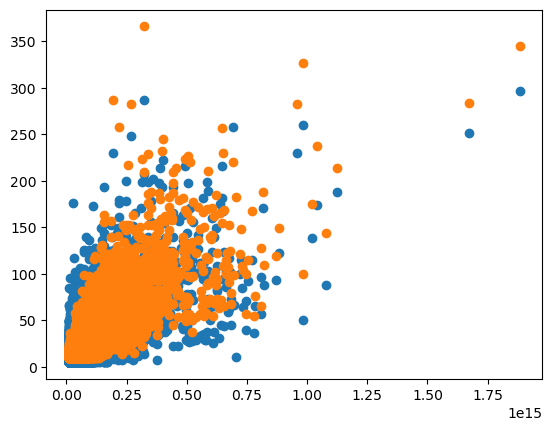

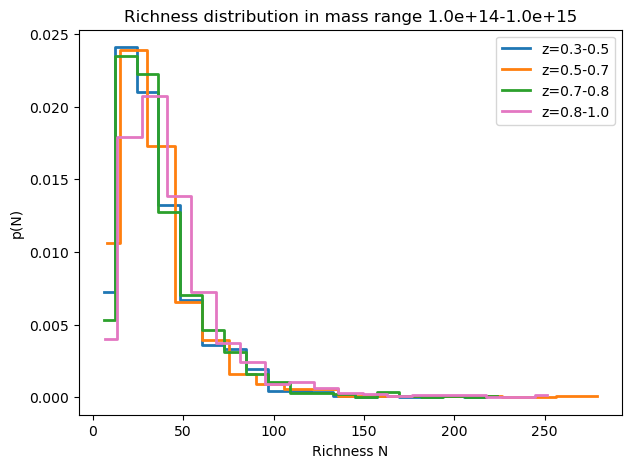

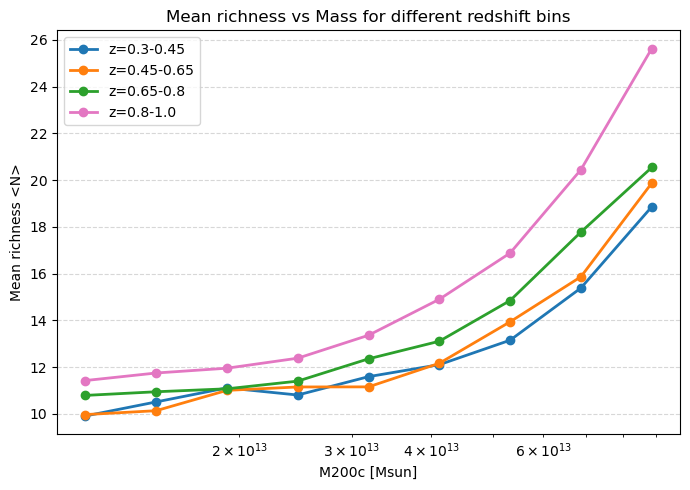

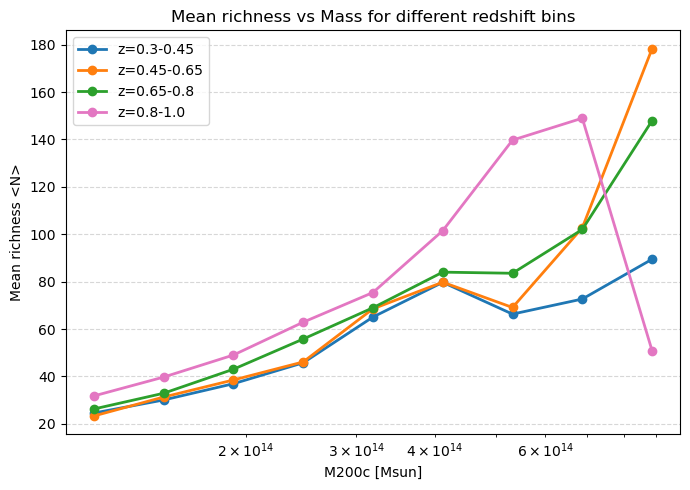

In [6]:
plt.scatter(t_cl_halo_match['m200c'], t_cl_halo_match['n200'], label="Cluster Richness")
plt.scatter(t_cl_halo_match['m200c'], t_cl_halo_match['NMEM_true'], label="True Richness")
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# --- Optional: restrict to a mass interval ---
mmin, mmax = 1e14, 1e15
mask_mass = (t_cl_halo_match['m200c'] > mmin) & (t_cl_halo_match['m200c'] < mmax)

# --- Redshift bins ---
z_bins = [0.3,  0.45, 0.65, 0.8,  1.]
z_labels = ["0.3-0.45", "0.45-0.65", "0.65-0.8", "0.8-1.0"]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:pink"]

plt.figure(figsize=(7,5))

for i in range(len(z_bins)-1):
    zmin, zmax = z_bins[i], z_bins[i+1]
    
    mask_z = (t_cl_halo_match['zp'] >= zmin) & (t_cl_halo_match['zp'] < zmax)
    
    mask = mask_mass & mask_z
    rich_data = t_cl_halo_match['n200'][mask]
    
    if len(rich_data) == 0:
        continue
    
    bins = np.linspace(0, rich_data.max(), 20)  # linear richness bins
    hist, edges = np.histogram(rich_data, bins=bins, density=True)
    centers = 0.5 * (edges[1:] + edges[:-1])
    
    plt.step(centers, hist, where='mid', color=colors[i], lw=2, label=f"z={zmin:.1f}-{zmax:.1f}")

plt.xlabel("Richness N")
plt.ylabel("p(N)")
plt.title(f"Richness distribution in mass range {mmin:.1e}-{mmax:.1e}")
plt.legend()
plt.show()

# --- Define redshift bins ---


# --- Define mass bins ---
mass_bins = np.logspace(13, 14, 10)  # e.g., 1e14 to 1e15 in 5 bins
mass_centers = 0.5 * (mass_bins[1:] + mass_bins[:-1])

plt.figure(figsize=(7,5))

# Loop over redshift bins
for zmin, zmax, color, zlabel in zip(z_bins[:-1], z_bins[1:], colors, z_labels):
    mean_richness = []
    
    mask_z = (t_cl_halo_match['zp'] >= zmin) & (t_cl_halo_match['zp'] < zmax)
    
    # Loop over mass bins
    for mmin, mmax in zip(mass_bins[:-1], mass_bins[1:]):
        mask_mass = (t_cl_halo_match['m200c'] >= mmin) & (t_cl_halo_match['m200c'] < mmax)
        mask = mask_z & mask_mass
        rich_data = t_cl_halo_match['n200'][mask]
        
        if len(rich_data) == 0:
            mean_richness.append(np.nan)
        else:
            mean_richness.append(np.mean(rich_data))
    
    plt.plot(mass_centers, mean_richness, marker='o', lw=2, color=color, label=f"z={zlabel}")

plt.xscale('log')
plt.xlabel("M200c [Msun]")
plt.ylabel("Mean richness <N>")
plt.title("Mean richness vs Mass for different redshift bins")
plt.grid(True, ls="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# --- Define mass bins ---
mass_bins = np.logspace(14, 15, 10)  # e.g., 1e14 to 1e15 in 5 bins
mass_centers = 0.5 * (mass_bins[1:] + mass_bins[:-1])

plt.figure(figsize=(7,5))

# Loop over redshift bins
for zmin, zmax, color, zlabel in zip(z_bins[:-1], z_bins[1:], colors, z_labels):
    mean_richness = []
    
    mask_z = (t_cl_halo_match['zp'] >= zmin) & (t_cl_halo_match['zp'] < zmax)
    
    # Loop over mass bins
    for mmin, mmax in zip(mass_bins[:-1], mass_bins[1:]):
        mask_mass = (t_cl_halo_match['m200c'] >= mmin) & (t_cl_halo_match['m200c'] < mmax)
        mask = mask_z & mask_mass
        rich_data = t_cl_halo_match['n200'][mask]
        
        if len(rich_data) == 0:
            mean_richness.append(np.nan)
        else:
            mean_richness.append(np.mean(rich_data))
    
    plt.plot(mass_centers, mean_richness, marker='o', lw=2, color=color, label=f"z={zlabel}")

plt.xscale('log')
plt.xlabel("M200c [Msun]")
plt.ylabel("Mean richness <N>")
plt.title("Mean richness vs Mass for different redshift bins")
plt.grid(True, ls="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


## Mass-Richness

In [7]:
def prior(params):
    if len(params) == 6:
        A, B, C, D, E, F = params
        if -2<C<2 and -2<E<2 and -2<F<2 and A > 0 and B > 0 and D > 0:
            return True
        else:
            return False
    else:
        A, B, D, E = params
        if -2<E<2 and A > 0 and B > 0 and D > 0:
            return True
        else:
            return False

In [12]:
richness = 'n200'
mass_cut = 4*10**13
rich_cut = 20
t_cl_halo_match_mor = t_cl_halo_match[(t_cl_halo_match['m200c'] > mass_cut) ]
def _ln_L(params, X, a, b, use_correction):
    # 1. Prior Check
    if not prior(params):
        return -np.inf
    
    # 2. Extract Data & Params
    pop, M, z = np.log(X[richness]), X["m200c"], X["zp"]
    
    if len(params) == 6:
        A, B, C, D, E, F = params
        mean_alpha = A + B*np.log(M/Mp) + C*np.log((1+z)/(1+zp))
        sigma = D + E*np.log(M/Mp) + F*np.log((1+z)/(1+zp))
    else:
        A, B, C, D = params
        mean_alpha = A + B*np.log(M/Mp) + C*np.log((1+z)/(1+zp))
        sigma = D 
    # 3. Physicality Check (Sigma must be positive for all points)
    if np.any(sigma <= 0):
        return -np.inf
    
    # 4. Standard Log-likelihood calculation
    # Using np.sum for speed and stability
    term1 = -0.5 * np.log(2 * np.pi * sigma**2)
    term2 = -0.5 * ((pop - mean_alpha) / sigma)**2
    ln_L = np.sum(term1 + term2)
    
    # 5. Optional Truncation Correction (Corrected logic)
    if use_correction:
        # P(a < n200 < b) = 0.5 * [erf((log(b)-mu)/(sig*sqrt2)) - erf((log(a)-mu)/(sig*sqrt2))]
        inv_sig_root2 = 1.0 / (sigma * np.sqrt(2))
        def erf_func(val):
            return scipy.special.erf((np.log(val) - mean_alpha) * inv_sig_root2)
        
        prob_in_bin = 0.5 * (erf_func(b) - erf_func(a))
        # Add the log of the normalization to the total likelihood
        ln_L -= np.sum(np.log(np.clip(prob_in_bin, 1e-10, None)))
        
    return ln_L

def MCMC(richesse_bin, redshift_bin, itt, redshift_params=True, correction=True, snr_cut = 0.0):
    a, b = richesse_bin
    c, d = redshift_bin
    
    # Selection
    mask = (t_cl_halo_match_mor[richness] > a) & (t_cl_halo_match_mor[richness] < b) & \
           (t_cl_halo_match_mor["zp"] > c) & (t_cl_halo_match_mor["zp"] < d) & \
           (t_cl_halo_match_mor["snr"] > snr_cut)
    X = t_cl_halo_match_mor[mask]
    
    if len(X) < 10: # Safety check for empty bins
        print(f"Warning: Bin {richesse_bin}, {redshift_bin} has only {len(X)} clusters.")
        return {'mean': np.zeros(6 if redshift_params else 4), 'std': np.zeros(6 if redshift_params else 4)}

    ndim = 6 if redshift_params else 4
    nwalkers = 24 # Use a multiple of 2 or 4 for better threading
    
    # Better initialization
    if redshift_params:
        guess = np.array([3.2, 0.8, 0.1, 0.5, 0.01, 0.01])
    else:
        guess = np.array([3.2, 0.8, 0.5, 0.01])
        
    p0 = [guess + 1e-4 * np.random.randn(ndim) for i in range(nwalkers)]
    
    sampler = emcee.EnsembleSampler(nwalkers, ndim, _ln_L, args=[X, a, b, correction])
    sampler.run_mcmc(p0, itt, progress=True)
    
    # Correct result extraction (Flattening)
    burn_in = int(itt * 0.3)
    unflat_samples = sampler.get_chain(discard=burn_in, flat=False)
    flat_samples = sampler.get_chain(discard=burn_in, flat=True)  
    log_prob_unflat = sampler.get_log_prob(discard=burn_in, flat=False)
    log_prob_flat   = sampler.get_log_prob(discard=burn_in, flat=True)

    idx_best = np.argmax(log_prob_flat)
    theta_best = flat_samples[idx_best]
    
    return {
        'chains': unflat_samples,
        'log_prob': log_prob_unflat,
        'mean': np.mean(flat_samples, axis=0),
        'median': np.median(flat_samples, axis=0),
        'std': np.std(flat_samples, axis=0),
        'map': theta_best
    }

### Unbinned

100%|██████████| 10000/10000 [01:38<00:00, 101.43it/s]


A: mean=3.6152, std=0.0150
B: mean=0.8431, std=0.0192
C: mean=0.8566, std=0.0740
D: mean=0.4746, std=0.0080


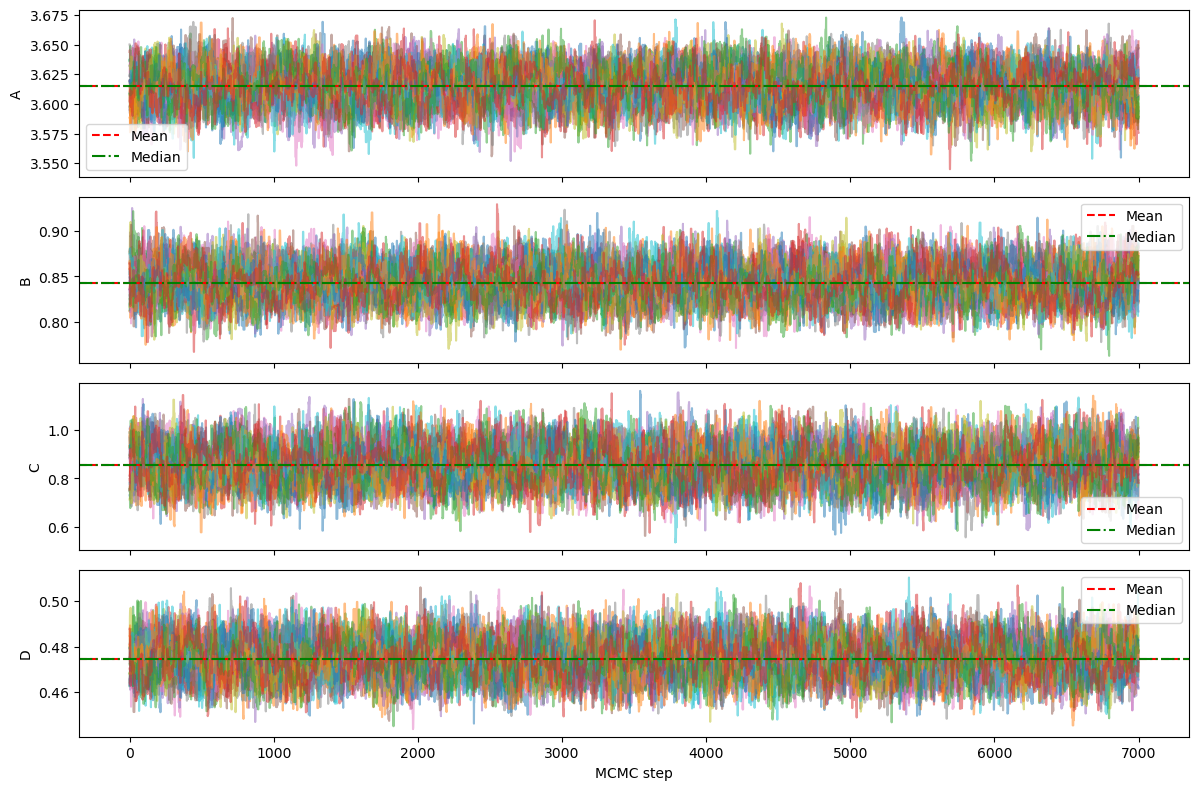

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

res = MCMC(richesse_bin=(rich_cut,400), 
           redshift_bin=(0.3,1.0), 
           itt=10000, redshift_params=False, correction=True, snr_cut = 0.0)

# Extract chains and statistics
chains = res['chains']  # shape: (nsteps, nwalkers, 6) or similar
means = res['mean']     # length 6
stds  = res['std']      # length 6

# Print best-fit values
param_names = ['A','B','C','D']
for i, name in enumerate(param_names):
    print(f"{name}: mean={means[i]:.4f}, std={stds[i]:.4f}")

# ------------------------------------------------------------------------------
# Plot chains to check convergence
# ------------------------------------------------------------------------------
n_params = 4
nsteps, nwalkers = chains.shape[0], chains.shape[1]

fig, axes = plt.subplots(n_params, 1, figsize=(12, 2*n_params), sharex=True)
for i in range(n_params):
    ax = axes[i]
    for w in range(nwalkers):
        ax.plot(chains[:, w, i], alpha=0.5)
    # Show mean and median lines
    mean_i = np.mean(chains[:, :, i])
    median_i = np.median(chains[:, :, i])
    ax.axhline(mean_i, color='red', linestyle='--', label='Mean')
    ax.axhline(median_i, color='green', linestyle='-.', label='Median')
    ax.set_ylabel(param_names[i])
    ax.legend()
axes[-1].set_xlabel('MCMC step')
plt.tight_layout()
plt.show()


In [15]:
import os
values = res['map']

# Safety check
if len(values) != 4:
    raise ValueError("Expected 4 parameters: mu_0, mu_1, mu_2, sigma")

output_path = os.path.join(os.getcwd(), "mor_best_fit_map.txt")

with open(output_path, "w") as f:
    f.write("# Best-fit MAP parameters\n")
    f.write("# mu_0   mu_1   mu_2   sigma\n")
    f.write(f"{values[0]:.8e}  {values[1]:.8e}  {values[2]:.8e}  {values[3]:.8e}\n")

print(f"Saved to: {output_path}")

Saved to: /sps/lsst/users/ebarroso/CLPipeline/examples/cosmodc2_wazp_gaussian/mor_best_fit_map.txt


## Testing Best Fit

A: MAP = 3.61587
B: MAP = 0.84074
C: MAP = 0.85238
D: MAP = 0.47386
14.300000000000002


/tmp/ipykernel_10180/1782574561.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


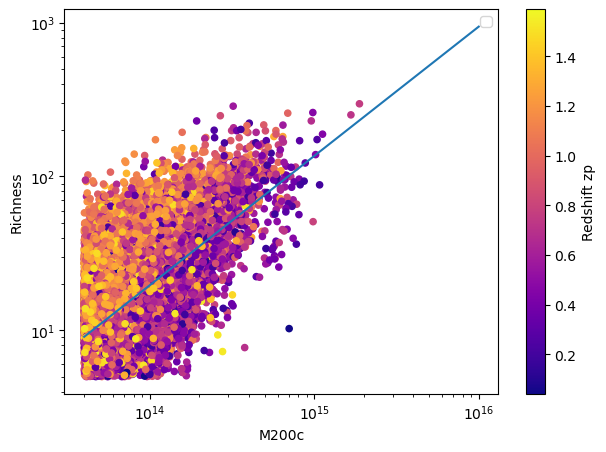

In [16]:
from crow import mass_proxy

logp = res['log_prob']
i, j = np.unravel_index(np.argmax(logp), logp.shape)
best_fit = res['map']
for name, val in zip(param_names, best_fit):
    print(f"{name}: MAP = {val:.5f}")
mass_richness_unb = mass_proxy.MurataUnbinned(np.log10(Mp), zp)
print(np.log10(np.exp(mass_richness_unb.pivot_ln_mass)))
mass_richness_unb.parameters["mu0"] = best_fit[0]
mass_richness_unb.parameters["mu1"] = best_fit[1]
mass_richness_unb.parameters["mu2"] = best_fit[2]
mass_richness_unb.parameters["sigma0"] = best_fit[3]
mass_richness_unb.parameters["sigma1"] = 0.0
mass_richness_unb.parameters["sigma2"] = 0.0


plt.figure(figsize=(7,5))

sc = plt.scatter(
    t_cl_halo_match_mor['m200c'],
    t_cl_halo_match_mor['n200'],
    c=t_cl_halo_match_mor['z_h'],
    cmap='plasma',
    s=20
)
# sc = plt.scatter(
#     t_cl_halo_match['m200c'],
#     t_cl_halo_match['n200'],
#     c=t_cl_halo_match['zp'],
#     cmap='viridis',
#     s=20
# )
rich_plot = np.linspace(np.log10(rich_cut),5, 200)
mass_plot = np.linspace(np.log10(mass_cut), 16, 200)
mean = mass_richness_unb.get_ln_mass_proxy_mean(mass_plot, np.array([0.4]))

plt.colorbar(sc, label="Redshift zp")
plt.xlabel("M200c")
plt.ylabel("Richness")
plt.legend()
plt.plot(10**mass_plot, np.exp(mean))
plt.xscale('log')
plt.yscale('log')
plt.show()


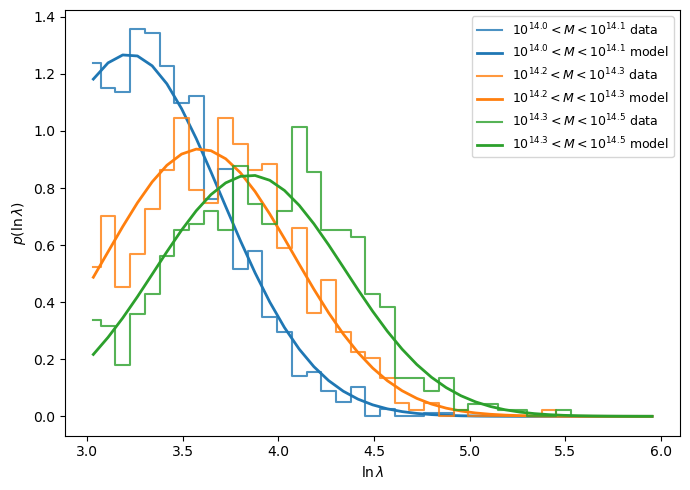

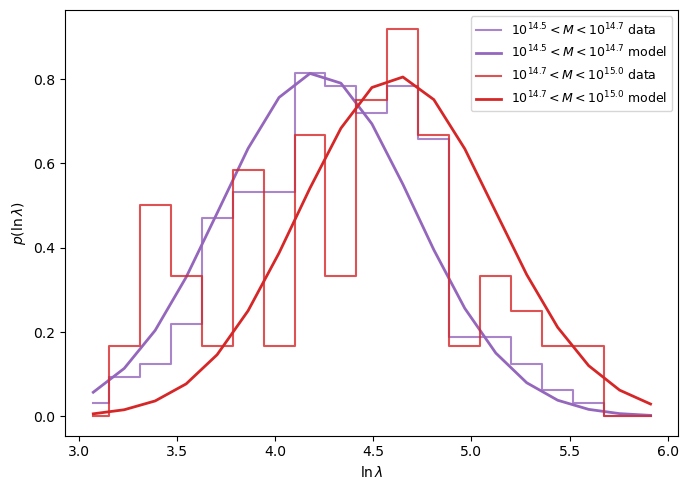

In [17]:
mass_bins_all = [
    (10**14.0, 10**14.1),
    (10**14.2, 10**14.3),
    (10**14.3, 10**14.5),
    (10**14.5, 10**14.7),
    (10**14.7, 10**15),
]

colors_all = ["tab:blue", "tab:orange", "tab:green", "tab:purple", "tab:red"]

# --- First figure: first three bins ---
plt.figure(figsize=(7,5))
for (mmin, mmax), col in zip(mass_bins_all[:3], colors_all[:3]):

    mask = (
        (t_cl_halo_match_mor['m200c'] > mmin) &
        (t_cl_halo_match_mor['m200c'] < mmax) &
        (t_cl_halo_match_mor['zp'] > 0.3) &
        (t_cl_halo_match_mor['zp'] < 1.0)
    )

    rich_data = t_cl_halo_match_mor['n200'][mask]
    z_data    = t_cl_halo_match_mor['zp'][mask]
    M_data    = t_cl_halo_match_mor['m200c'][mask]

    bins = np.linspace(np.log(rich_cut), np.log(400), 40)
    hist, edges = np.histogram(np.log(rich_data), bins=bins, density=True)
    centers = 0.5 * (edges[1:] + edges[:-1])

    pdf = []
    for lnlam in centers:
        log10lam = lnlam / np.log(10)
        vals = mass_richness_unb.distribution(
                  np.log10(M_data),
                  z_data,
                  np.full_like(M_data, log10lam)
               )
        pdf.append(np.mean(vals))
    pdf = np.array(pdf)

    label = fr"$10^{{{np.log10(mmin):.1f}}} < M < 10^{{{np.log10(mmax):.1f}}}$"
    plt.step(centers, hist/np.trapezoid(hist, centers), where='mid', color=col, alpha=0.8, label=label + " data")
    plt.plot(centers, pdf/np.trapezoid(pdf, centers), color=col, lw=2, label=label + " model")

plt.xlabel(r"$\ln \lambda$")
plt.ylabel(r"$p(\ln \lambda)$")
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()


# --- Second figure: last two bins ---
plt.figure(figsize=(7,5))
for (mmin, mmax), col in zip(mass_bins_all[3:], colors_all[3:]):

    mask = (
        (t_cl_halo_match_mor['m200c'] > mmin) &
        (t_cl_halo_match_mor['m200c'] < mmax) &
        (t_cl_halo_match_mor['zp'] > 0.3) &
        (t_cl_halo_match_mor['zp'] < 1.0)
    )

    rich_data = t_cl_halo_match_mor['n200'][mask]
    z_data    = t_cl_halo_match_mor['zp'][mask]
    M_data    = t_cl_halo_match_mor['m200c'][mask]

    bins = np.linspace(np.log(rich_cut), np.log(400), 20)
    hist, edges = np.histogram(np.log(rich_data), bins=bins, density=True)
    centers = 0.5 * (edges[1:] + edges[:-1])

    pdf = []
    for lnlam in centers:
        log10lam = lnlam / np.log(10)
        vals = mass_richness_unb.distribution(
                  np.log10(M_data),
                  z_data,
                  np.full_like(M_data, log10lam)
               )
        pdf.append(np.mean(vals))
    pdf = np.array(pdf)

    label = fr"$10^{{{np.log10(mmin):.1f}}} < M < 10^{{{np.log10(mmax):.1f}}}$"
    plt.step(centers, hist/np.trapezoid(hist, centers), where='mid', color=col, alpha=0.8, label=label + " data")
    plt.plot(centers, pdf/np.trapezoid(pdf, centers), color=col, lw=2, label=label + " model")

plt.xlabel(r"$\ln \lambda$")
plt.ylabel(r"$p(\ln \lambda)$")
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()


## Saving Data to Sacc

In [19]:
import numpy as np
import pyarrow.parquet as pq
cluster_catalo_wazp = Table.read("/sps/lsst/groups/clusters/cl_pipeline_project/pywazp_gaussian_catalogs/cluster_010_photoz_catalog.fits")
display(cluster_catalo_wazp)
# 1. Define bins
richness_bins_linear = [20, 40, 80, 200]

# We bin in log10 space
richness_bins_log = np.log10(richness_bins_linear)


# 3. Process data into numpy
# Converting directly to log10 here avoids creating a third massive array
print("Converting richness to log10...")
log10_richness_data = np.log10(cluster_catalo_wazp['n200'])
redshift_data = cluster_catalo_wazp['zp']


# 4. Compute 2D Histogram
print("Computing 2D histogram...")
counts, z_edges, l_edges = np.histogram2d(
    redshift_data,
    log10_richness_data,  
    bins=[z_bins, richness_bins_log]
)
print(l_edges)
# 5. Save to TXT
header = (f"Richness_bins_log_edges: {richness_bins_log}\n"
          f"Redshift_bins_edges: {z_bins}\n"
          "Rows: Richness bins | Cols: Redshift bins")


print(counts)
print(len(counts))

ra,dec,zp,n200,r200_mpc,id,snr,mt_self,mt_other,mt_multi_self,mt_multi_other,mt_frac_self,mt_frac_other,mt_cross,mt_frac_self_max,mt_frac_other_max
float64,float64,float32,float32,float32,bytes30,float32,bytes13,bytes13,bytes109,bytes109,float64,float64,bytes13,float64,float64
47.82499339282766,-35.675710462690425,0.787805,7.62,0.422,240271,4.542,--,--,--,--,0.0,0.0,--,0.0,0.0
47.830811472387325,-30.007016653453594,0.94940674,6.283,0.436,373353,3.744,--,--,--,--,0.0,0.0,--,0.0,0.0
47.842703745653075,-27.266088774225345,0.9619872,8.964,0.422,109671,6.024,--,--,--,--,0.0,0.0,--,0.0,0.0
47.84613176343512,-27.260573733477237,1.2169273,9.782,0.425,244956,4.507,--,--,--,--,0.0,0.0,--,0.0,0.0
47.850813839353314,-29.99932990011379,1.0275872,6.025,0.398,271873,4.323,2390300051241,2390300051241,2390300051241,2390300051241,0.7155331405146373,0.6,2390300051241,0.7155331405146373,0.6
47.85285990968647,-27.28160033526319,1.2050031,14.534,0.487,233551,4.594,--,--,--,--,0.0,0.0,--,0.0,0.0
47.85313305023591,-27.26307594123677,0.5584858,8.045,0.588,506070,3.174,--,--,--,--,0.0,0.0,--,0.0,0.0
47.859885397526924,-41.85132730704162,1.227102,9.499,0.33,73500,6.846,--,--,--,--,0.0,0.0,--,0.0,0.0
47.860099746318305,-41.78852804890636,1.245531,7.118,0.3,394441,3.644,--,--,--,--,0.0,0.0,--,0.0,0.0


Converting richness to log10...
Computing 2D histogram...
[1.30103    1.60205999 1.90308999 2.30103   ]
[[ 778.  237.   42.]
 [1519.  401.   66.]
 [1790.  394.   71.]
 [3698.  721.  115.]]
4


In [20]:
from astropy.io import fits
from scipy import stats
from typing import Any
import sacc
import itertools
area = 439.78986
covariance = np.diag(counts.flatten())
s_count = sacc.Sacc()
bin_z_labels = []
bin_richness_labels = []

survey_name = "cosmodc2_wazp_halos"
s_count.add_tracer("survey", survey_name, area)

for i, z_bin in enumerate(zip(z_edges[:-1], z_edges[1:])):
    lower, upper = z_bin
    bin_z_label = f"bin_z_{i}"
    s_count.add_tracer("bin_z", bin_z_label, lower, upper)
    bin_z_labels.append(bin_z_label)

for i, richness_bin in enumerate(zip(l_edges[:-1], l_edges[1:])):
    lower, upper = richness_bin
    bin_richness_label = f"rich_{i}"
    s_count.add_tracer("bin_richness", bin_richness_label, lower, upper)
    bin_richness_labels.append(bin_richness_label)

#  pylint: disable-next=no-member
cluster_count = sacc.standard_types.cluster_counts

counts_and_edges = zip(
    counts.flatten(), itertools.product(bin_z_labels, bin_richness_labels)
)
print(counts)

for counts_i, (bin_z_label, bin_richness_label) in counts_and_edges:
    s_count.add_data_point(
        cluster_count, (survey_name, bin_richness_label, bin_z_label), int(counts_i)
    )
s_count.add_covariance(covariance)
s_count.to_canonical_order()
#s_count.save_fits("./outputs/clusters_sacc_file_cov.sacc", overwrite=True)
s_count.save_fits("./cosmodc2_wazp_counts/clusters_sacc_file.sacc", overwrite=True)
print(s_count.data)

[[ 778.  237.   42.]
 [1519.  401.   66.]
 [1790.  394.   71.]
 [3698.  721.  115.]]
[DataPoint(data_type='cluster_counts', tracers=('cosmodc2_wazp_halos', 'rich_0', 'bin_z_0'), value=778, ), DataPoint(data_type='cluster_counts', tracers=('cosmodc2_wazp_halos', 'rich_0', 'bin_z_1'), value=1519, ), DataPoint(data_type='cluster_counts', tracers=('cosmodc2_wazp_halos', 'rich_0', 'bin_z_2'), value=1790, ), DataPoint(data_type='cluster_counts', tracers=('cosmodc2_wazp_halos', 'rich_0', 'bin_z_3'), value=3698, ), DataPoint(data_type='cluster_counts', tracers=('cosmodc2_wazp_halos', 'rich_1', 'bin_z_0'), value=237, ), DataPoint(data_type='cluster_counts', tracers=('cosmodc2_wazp_halos', 'rich_1', 'bin_z_1'), value=401, ), DataPoint(data_type='cluster_counts', tracers=('cosmodc2_wazp_halos', 'rich_1', 'bin_z_2'), value=394, ), DataPoint(data_type='cluster_counts', tracers=('cosmodc2_wazp_halos', 'rich_1', 'bin_z_3'), value=721, ), DataPoint(data_type='cluster_counts', tracers=('cosmodc2_wazp_h